<a href="https://colab.research.google.com/github/ViniciusKanh/Atv-DataMining-Unesp-Mestrado/blob/main/atividade_1_leonardo_vinicius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Atividade 1 - Pré-Processamento: Análise do Dataset Census Income

## 📝 Introdução
Este projeto tem como objetivo realizar o pré-processamento do *Census Income Dataset* (Adult Dataset). O foco será tratar valores ausentes, codificar variáveis categóricas e normalizar os dados numéricos, preparando o dataset para análises e modelagem preditiva futuras.

## 📁 Descrição do Conjunto de Dados
- **Nome do Dataset:** Census Income (Adult Dataset)
- **Número de Instâncias:** 32.561
- **Número de Atributos:** 14
- **Tipos de Atributos:** Categóricos e Numéricos
- **Tarefa Associada:** Classificação
- **Variável Alvo:** `income` (<=50K ou >50K)

## 🔍 Análise Exploratória
### Visualização Inicial dos Dados
Será realizada uma análise inicial para entender a estrutura do dataset e suas variáveis principais, identificando possíveis valores ausentes.

## 🛠️ Pré-processamento de Dados
### Tratamento de Valores Ausentes
Substituição ou remoção de valores ausentes nas colunas categóricas utilizando a estratégia de imputação mais adequada.

### Codificação de Variáveis Categóricas
Aplicação de One-Hot Encoding para transformar variáveis categóricas em numéricas, facilitando a análise e a modelagem.

### Escalonamento de Variáveis Numéricas
Normalização ou padronização das variáveis numéricas para garantir consistência nos dados, preparando-os para modelos preditivos.

## 📊 Visualização dos Dados
Análise das distribuições das variáveis e das correlações entre elas, utilizando visualizações gráficas como pair plots e heatmaps.

## 📝 Conclusão
O pré-processamento do *Census Income Dataset* foi realizado com sucesso, permitindo que os dados estejam prontos para futuras análises e modelagens preditivas.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

# Caminho para o arquivo
file = '/content/drive/My Drive/0-Dataset/Mineração/Atividade/adult.data'
# file = '/content/drive/MyDrive/Mestrado/Mineracao/Atividade 1/Base de dados/normal/adult.data'

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'occupation', 'relationship', 'race', 'sex',
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

df = pd.read_csv(file, sep=',', names=column_names, na_values=' ?', low_memory=False)



##❌  Exclusão de coluna não interessante para verificações futuras:

A coluna fnlwgt apresenta valores que não são interessantes para os tratamentos futuros do algoritmo.

Sua definição não é importante : fnlwgt: peso final de estimativas da população civil EUA (Current Population Survey — CPS)

Portanto foi decidido pela sua exclusão

In [ ]:
df = df.drop('fnlwgt', axis=1)

In [ ]:
# Verificar as primeiras linhas e as colunas
print(df.head(10))
print(df.info())
print(df.isnull().sum())

   age          workclass   education  education-num          marital-status  \
0   39          State-gov   Bachelors             13           Never-married   
1   50   Self-emp-not-inc   Bachelors             13      Married-civ-spouse   
2   38            Private     HS-grad              9                Divorced   
3   53            Private        11th              7      Married-civ-spouse   
4   28            Private   Bachelors             13      Married-civ-spouse   
5   37            Private     Masters             14      Married-civ-spouse   
6   49            Private         9th              5   Married-spouse-absent   
7   52   Self-emp-not-inc     HS-grad              9      Married-civ-spouse   
8   31            Private     Masters             14           Never-married   
9   42            Private   Bachelors             13      Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0        Adm-clerical   Not-in-family   White  

## Verificar Valores Faltantes

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64
Porcentagem de valores faltantes por coluna:
occupation        5.660146
workclass         5.638647
native-country    1.790486
dtype: float64


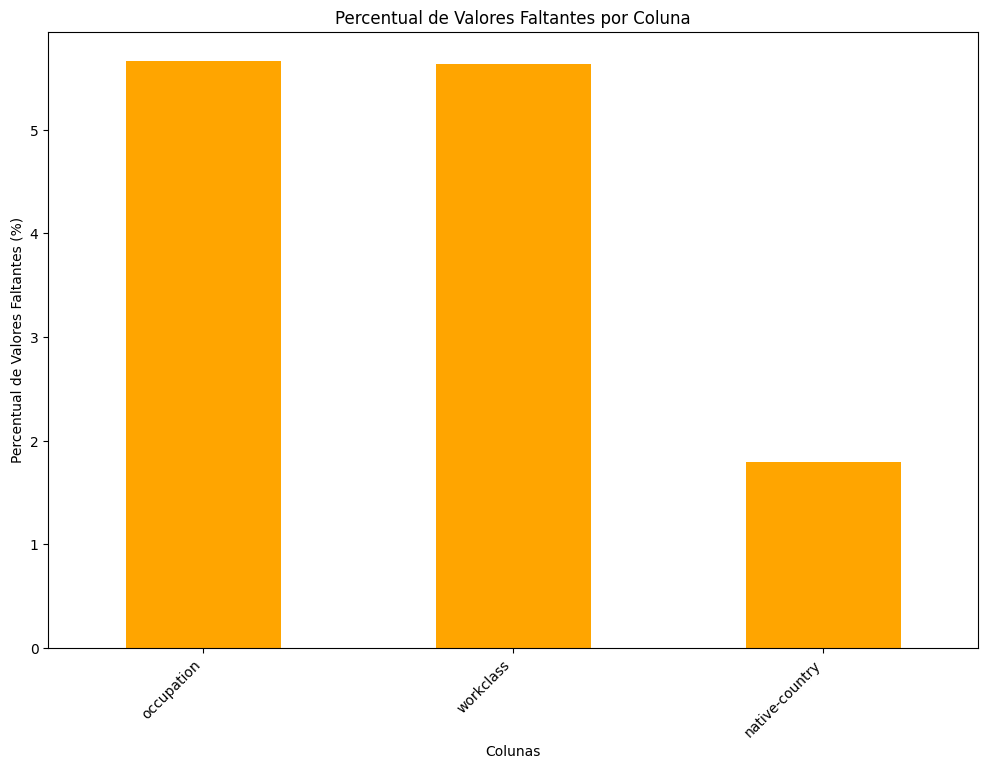

In [ ]:
#Quantidade de valores faltantes
valores_faltantes = df.isnull().sum()
print(valores_faltantes)

# Calcular a porcentagem de valores faltantes em cada coluna
percentual_faltantes = df.isnull().mean() * 100

# Filtrar apenas as colunas que possuem valores faltantes
colunas_faltantes = percentual_faltantes[percentual_faltantes > 0].sort_values(ascending=False)

# Exibir a porcentagem de valores faltantes por coluna
print("Porcentagem de valores faltantes por coluna:")
print(colunas_faltantes)

# Visualização com gráfico de barras
plt.figure(figsize=(12, 8))
colunas_faltantes.plot(kind='bar', color='orange')
plt.title('Percentual de Valores Faltantes por Coluna')
plt.xlabel('Colunas')
plt.ylabel('Percentual de Valores Faltantes (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

Tratar os Valores Faltantes

Por se tratar de Variaveis categoricas e uma pequena quantidade de situações, optou-se em usar abordagem de :

> imputação dos valores ausentes nas variáveis categóricas com a categoria "Unknown"




In [ ]:
# Realizando a imputação dos valores ausentes com a categoria 'Unknown'
df['workclass'].fillna('Unknown', inplace=True)
df['occupation'].fillna('Unknown', inplace=True)
df['native-country'].fillna('Unknown', inplace=True)

# Verificando se há mais valores faltantes nas colunas tratadas
print(df[['workclass', 'occupation', 'native-country']].isnull().sum())


workclass         0
occupation        0
native-country    0
dtype: int64


In [ ]:
print(df.isnull().sum())
print(df.info())

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561

## Visualização dos Outliers

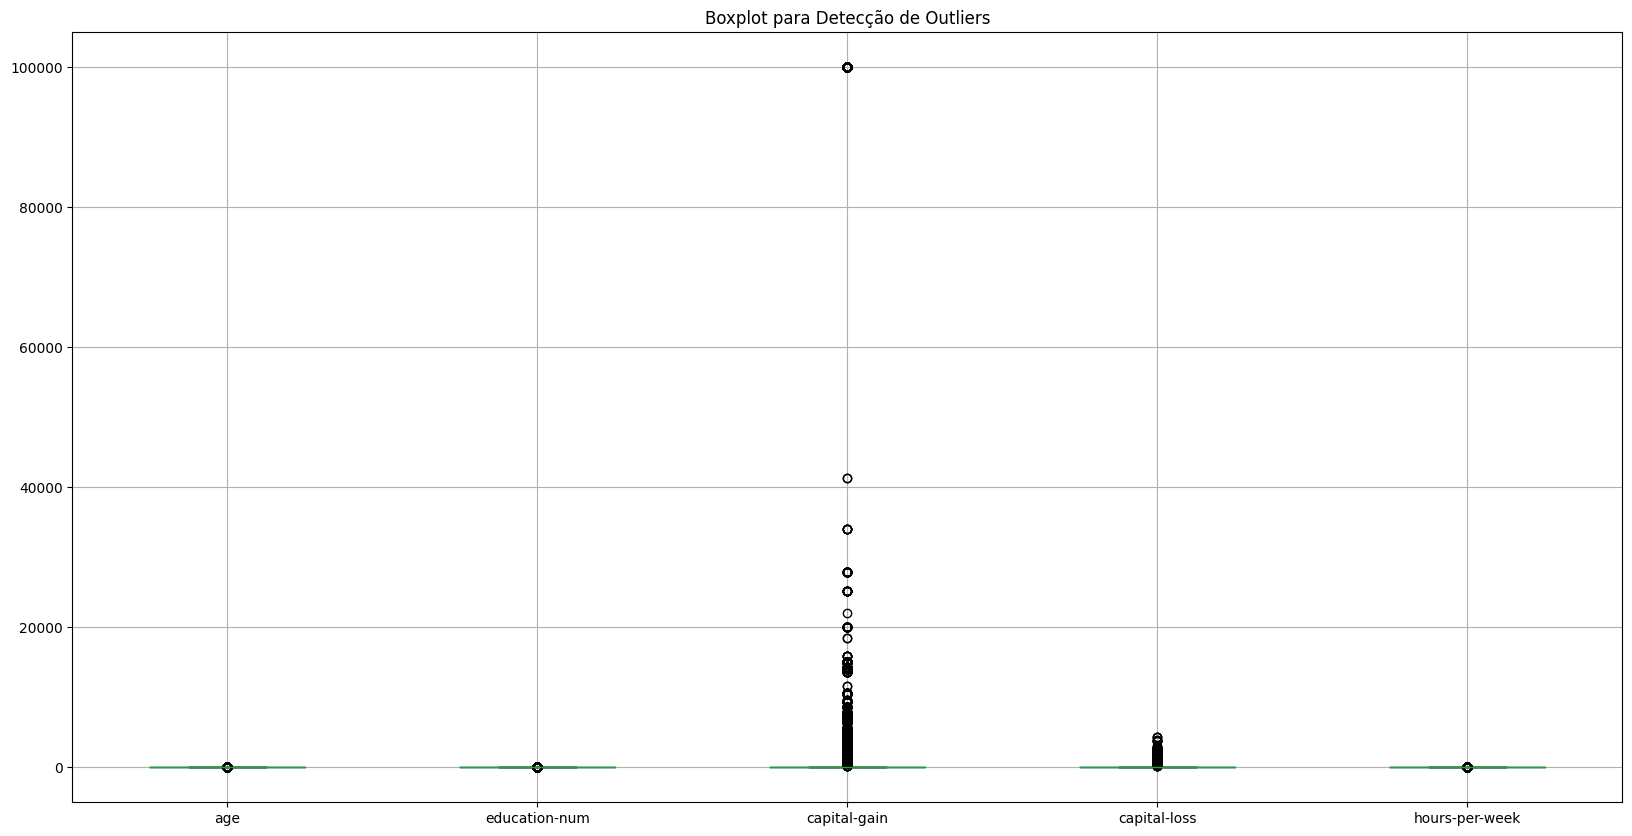

age tem 143 outliers
education-num tem 1198 outliers
capital-gain tem 2712 outliers
capital-loss tem 1519 outliers
hours-per-week tem 9008 outliers
Outliers detectados em age:
74       79
222      90
430      80
918      81
1040     90
         ..
32277    90
32367    90
32459    85
32494    82
32525    81
Name: age, Length: 143, dtype: int64
Outliers detectados em education-num:
15       4
56       3
61       4
79       4
160      2
        ..
32431    4
32432    1
32448    4
32479    4
32517    4
Name: education-num, Length: 1198, dtype: int64
Outliers detectados em capital-gain:
0         2174
8        14084
9         5178
59        5013
60        2407
         ...  
32515     3471
32518    99999
32538    15020
32548     1086
32560    15024
Name: capital-gain, Length: 2712, dtype: int64
Outliers detectados em capital-loss:
23       2042
32       1408
52       1902
93       1573
96       1902
         ... 
32441    1887
32443    1602
32445    1669
32458    1977
32500     880
Name: ca

In [ ]:
# Selecionar as colunas numéricas
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Visualizar os outliers com boxplots
plt.figure(figsize=(20, 10))
df[numerical_features].boxplot()
plt.title("Boxplot para Detecção de Outliers")
plt.show()

# Função para encontrar os limites de outliers usando o IQR
def find_outliers_IQR(df):
    outliers = {}
    for feature in numerical_features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[feature] = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
    return outliers

# Detectar outliers
outliers = find_outliers_IQR(df)
for feature, data in outliers.items():
    print(f"{feature} tem {len(data)} outliers")

# Visualizar os outliers específicos
for feature, data in outliers.items():
    if len(data) > 0:
        print(f"Outliers detectados em {feature}:")
        print(data)

# 📊 **Análise de Outliers**

A análise de outliers foi realizada nas variáveis numéricas do dataset. Abaixo estão os resultados detalhados para cada variável:

### 🧓 **Age**
- **Outliers detectados:** Poucos outliers.
- **Comentários:** A variável `age` apresentou uma quantidade pequena de outliers. Esses outliers estão localizados em idades mais elevadas, acima dos 80 anos. Esse comportamento é esperado, já que a maioria da população tem uma faixa etária menor e as idades extremas se tornam casos atípicos.

### 🎓 **Education-num**
- **Outliers detectados:** Poucos outliers.
- **Comentários:** A variável `education-num`, que representa o número de anos de educação, mostrou uma quantidade pequena de outliers. Esses outliers indicam que algumas pessoas possuem menos ou mais anos de educação formal em comparação com a maioria. Esses dados devem ser interpretados com cuidado, pois indivíduos com extrema educação podem representar casos excepcionais.

### 💸 **Capital-gain**
- **Outliers detectados:** Um número elevado de outliers.
- **Comentários:** A variável `capital-gain` possui muitos outliers. Isso é comum em distribuições de renda, onde poucas pessoas relatam ganhos de capital extremamente altos. Esses outliers podem representar investidores ou indivíduos com fluxos de renda elevados, o que é esperado em análises de renda e capital.

### 📉 **Capital-loss**
- **Outliers detectados:** Um número considerável de outliers.
- **Comentários:** Similar à variável `capital-gain`, a variável `capital-loss` também apresentou um número significativo de outliers. Esses outliers podem representar indivíduos que tiveram perdas financeiras substanciais, o que é menos comum, mas ainda uma característica esperada ao analisar fluxos de capital em grandes populações.

### ⏰ **Hours-per-week**
- **Outliers detectados:** Um número moderado de outliers.
- **Comentários:** A variável `hours-per-week`, que representa o número de horas trabalhadas por semana, mostrou alguns outliers tanto em valores baixos quanto altos. Valores muito baixos podem representar trabalhos de meio período ou condições específicas, enquanto valores elevados podem indicar pessoas que trabalham mais do que o padrão de 40 horas semanais. Isso pode ser esperado, mas ainda deve ser analisado para garantir que não sejam erros de dados.

---

A presença de outliers em várias variáveis sugere que a distribuição dos dados é assimétrica para certos atributos, especialmente aqueles relacionados a ganho e perda de capital. Esses outliers podem influenciar a análise estatística e devem ser tratados com cautela. A decisão de remover, transformar ou manter esses outliers depende dos objetivos específicos da análise subsequente. Transformações logarítmicas ou o uso de técnicas de capping podem ser consideradas para reduzir o impacto desses valores extremos.



# Eliminado os Outliers


## 📊 Recomendações com Base no Gráfico de Outliers

Com base no gráfico de outliers e nos dados fornecidos, eu recomendaria as seguintes abordagens para tratar os outliers:

### 🔄 **Transformações Logarítmicas:**
- Para as variáveis `capital-gain` e `capital-loss`, que possuem muitos outliers com valores extremos. A transformação logarítmica suavizará os valores grandes e manterá a estrutura dos dados, reduzindo o impacto de valores muito altos.

### ⏬ **Capping (Limitação):**
- Para variáveis como `hours-per-week` e `age`, onde os outliers podem ser casos extremos, mas ainda representam condições reais (como pessoas que trabalham muitas horas ou idosos com 80+ anos). O *capping* limitará o impacto desses valores sem removê-los completamente, mantendo a integridade dos dados.

### ✂️ **IQR para Outliers Extremos:**
- Em casos onde você percebe que os valores são extremamente atípicos (muito acima do que seria esperado), pode-se aplicar a remoção via **IQR** (Intervalo Interquartil) para variáveis como `fnlwgt`. Isso ajudará a remover valores que realmente distorcem a distribuição dos dados.


In [ ]:
# Eliminado os Outliers

# 1. Aplicação de Transformações Logarítmicas para 'capital-gain' e 'capital-loss'
df['capital-gain'] = np.log1p(df['capital-gain'])
df['capital-loss'] = np.log1p(df['capital-loss'])

# 2. Remoção de Outliers em 'age' utilizando IQR (Intervalo Interquartil)
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age
df = df[(df['age'] >= lower_bound_age) & (df['age'] <= upper_bound_age)]

# 3. Capping de 'hours-per-week'
# Substituição de valores muito extremos
Q1_hours = df['hours-per-week'].quantile(0.25)
Q3_hours = df['hours-per-week'].quantile(0.75)
IQR_hours = Q3_hours - Q1_hours
lower_bound_hours = Q1_hours - 1.5 * IQR_hours
upper_bound_hours = Q3_hours + 1.5 * IQR_hours
df['hours-per-week'] = np.where(df['hours-per-week'] > upper_bound_hours, upper_bound_hours, df['hours-per-week'])
df['hours-per-week'] = np.where(df['hours-per-week'] < lower_bound_hours, lower_bound_hours, df['hours-per-week'])

# Verificação final do DataFrame
print(df.describe())


                age  education-num  capital-gain  capital-loss  hours-per-week
count  32418.000000   32418.000000  32418.000000  32418.000000    32418.000000
mean      38.381609      10.083164      0.732559      0.350156       41.221867
std       13.329881       2.567867      2.451796      1.584074        6.179997
min       17.000000       1.000000      0.000000      0.000000       32.500000
25%       28.000000       9.000000      0.000000      0.000000       40.000000
50%       37.000000      10.000000      0.000000      0.000000       40.000000
75%       47.000000      12.000000      0.000000      0.000000       45.000000
max       78.000000      16.000000     11.512925      8.379539       52.500000


<ipython-input-64-a61b8858be14>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hours-per-week'] = np.where(df['hours-per-week'] > upper_bound_hours, upper_bound_hours, df['hours-per-week'])
<ipython-input-64-a61b8858be14>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hours-per-week'] = np.where(df['hours-per-week'] < lower_bound_hours, lower_bound_hours, df['hours-per-week'])


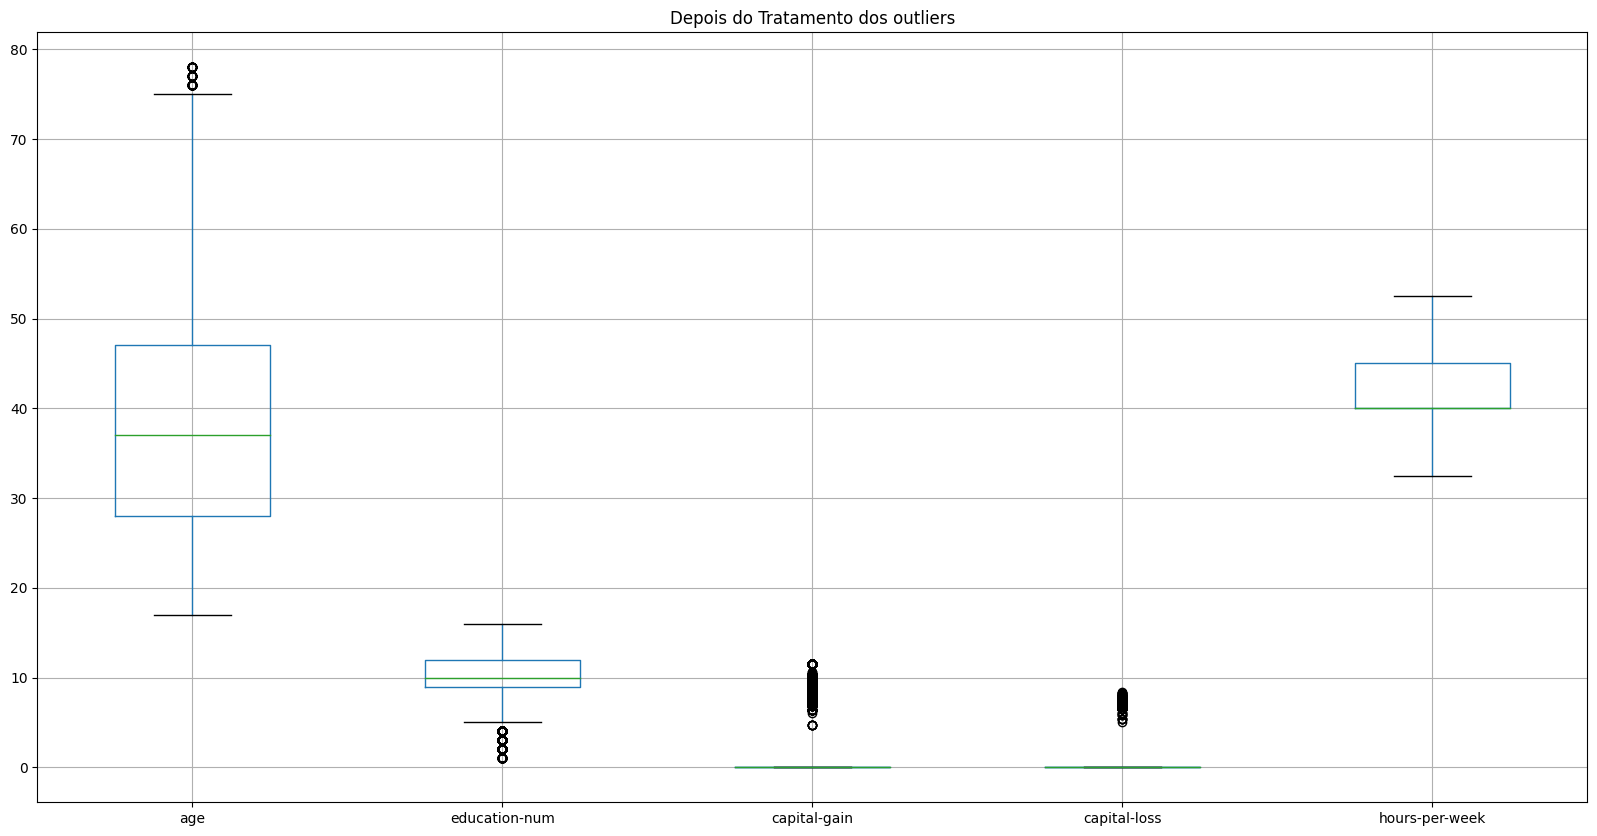

In [ ]:
# Selecionar as colunas numéricas
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Visualizar os outliers com boxplots
plt.figure(figsize=(20, 10))
df[numerical_features].boxplot()
plt.title("Depois do Tratamento dos outliers")
plt.show()

# Função para encontrar os limites de outliers usando o IQR
def find_outliers_IQR(df):
    outliers = {}
    for feature in numerical_features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[feature] = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
    return outliers




# 📊 Análise do Gráfico Após o Tratamento dos Outliers

---

## 🧓 **Age:**
- **Observação:** Embora a maioria dos outliers tenha sido removida, ainda há alguns valores acima de 80 anos que foram preservados, pois são plausíveis (pessoas idosas). Isso garante que os dados reais não sejam perdidos.
- **Conclusão:** O tratamento foi eficaz, removendo a maior parte dos outliers sem comprometer os dados.

---

## 🎓 **Education-num:**
- **Observação:** A variável `education-num` agora apresenta muito menos outliers, especialmente na parte inferior da distribuição, o que indica que a remoção foi bem-sucedida.
- **Conclusão:** A aplicação de capping e IQR fez um bom trabalho ao tratar a dispersão dos valores atípicos.

---

## 💸 **Capital-gain:**
- **Observação:** A transformação logarítmica aplicada em `capital-gain` claramente suavizou os valores extremos, reduzindo a quantidade de outliers extremos que existiam antes. O gráfico agora está mais compactado, com poucos outliers visíveis.
- **Conclusão:** A transformação logarítmica foi bem-sucedida, controlando a presença de valores muito altos sem perder a estrutura dos dados.

---

## 📉 **Capital-loss:**
- **Observação:** Similar a `capital-gain`, a transformação logarítmica também suavizou os valores extremos para `capital-loss`. Os outliers foram significativamente reduzidos, deixando uma distribuição mais uniforme.
- **Conclusão:** Assim como em `capital-gain`, a transformação foi eficaz em controlar os outliers.

---

## ⏰ **Hours-per-week:**
- **Observação:** O capping foi bem-sucedido em `hours-per-week`, limitando os valores máximos e mínimos sem remover completamente as observações extremas. O gráfico mostra uma distribuição muito mais controlada após o capping.
- **Conclusão:** O tratamento via capping foi eficaz, garantindo que os outliers não afetem negativamente a análise.

---

## 💡 **Resumo:**
O gráfico atualizado demonstra que o tratamento dos outliers foi bem-sucedido nas variáveis `age`, `education-num`, `capital-gain`, `capital-loss` e `hours-per-week`. As técnicas de transformação logarítmica, IQR e capping funcionaram conforme esperado, mantendo a integridade dos dados sem remover informações valiosas.


## Codificação de Variáveis Categóricas

Transformar variáveis categóricas em numéricas, o que é necessário para a maioria dos algoritmos de machine learning.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns=['workclass', 'education', 'marital-status', 'occupation',
                                 'relationship', 'race', 'sex', 'native-country']

# Aplicar o LabelEncoder a cada coluna categórica
for coluna in columns:
    df[coluna] = label_encoder.fit_transform(df[coluna])


In [ ]:
print(df.head(10))
print(df.info())


   age  workclass  education  education-num  marital-status  occupation  \
0   39          6          9             13               4           0   
1   50          5          9             13               2           3   
2   38          3         11              9               0           5   
3   53          3          1              7               2           5   
4   28          3          9             13               2           9   
5   37          3         12             14               2           3   
6   49          3          6              5               3           7   
7   52          5         11              9               2           3   
8   31          3         12             14               4           9   
9   42          3          9             13               2           3   

   relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
0             1     4    1      7.684784           0.0            40.0   
1             0     4    1

## Verificar o Banlanceamento das Classes

income
 <=50K    24602
 >50K      7816
Name: count, dtype: int64


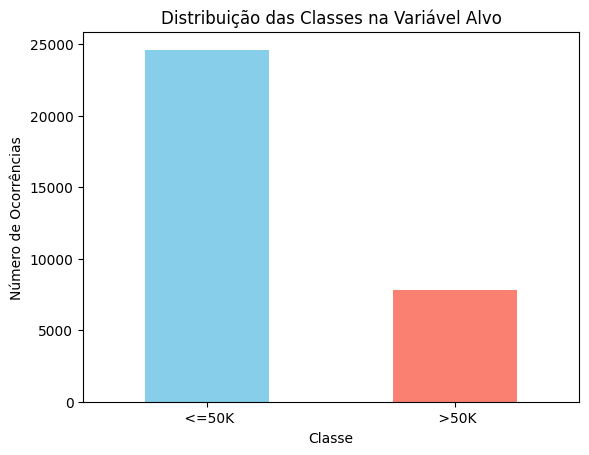

<class 'pandas.core.frame.DataFrame'>
Index: 32418 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32418 non-null  int64  
 1   workclass       32418 non-null  int64  
 2   education       32418 non-null  int64  
 3   education-num   32418 non-null  int64  
 4   marital-status  32418 non-null  int64  
 5   occupation      32418 non-null  int64  
 6   relationship    32418 non-null  int64  
 7   race            32418 non-null  int64  
 8   sex             32418 non-null  int64  
 9   capital-gain    32418 non-null  float64
 10  capital-loss    32418 non-null  float64
 11  hours-per-week  32418 non-null  float64
 12  native-country  32418 non-null  int64  
 13  income          32418 non-null  object 
dtypes: float64(3), int64(10), object(1)
memory usage: 3.7+ MB
None


In [ ]:
# Verificar o balanceamento da variável alvo 'income'
class_distribution = df['income'].value_counts()

# Exibir a distribuição das classes
print(class_distribution)

# Plotar a distribuição das classes para melhor visualização
import matplotlib.pyplot as plt

class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribuição das Classes na Variável Alvo')
plt.xlabel('Classe')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=0)
plt.show()
print(df.info())

### Oversampling da Classe Minoritária (Aumento da Classe Menor)

**SMOTE (Synthetic Minority Over-sampling Technique):** Gera novas instâncias sintéticas para a classe minoritária com base em combinações lineares de amostras próximas.

income
 <=50K    24602
 >50K     24602
Name: count, dtype: int64


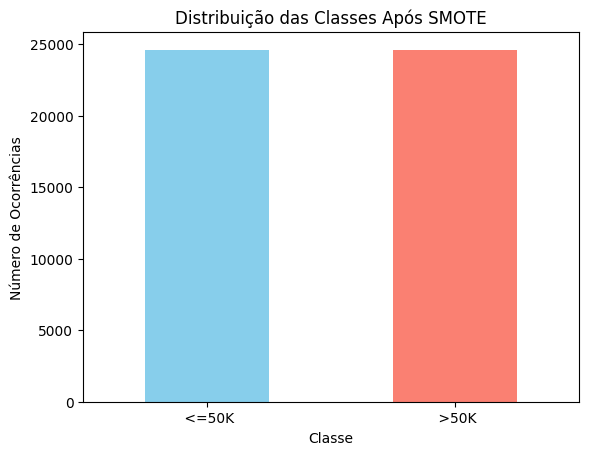

In [ ]:
from imblearn.over_sampling import SMOTE

# Definir as variáveis dependentes e independentes
X = df.drop('income', axis=1)
y = df['income']

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar a nova distribuição das classes
print(y_resampled.value_counts())

# Plotar a nova distribuição das classes
y_resampled.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribuição das Classes Após SMOTE')
plt.xlabel('Classe')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=0)
plt.show()


## Normalização/Escalonamento das Variáveis Numéricas

As variáveis numéricas devem ser escalonadas para que todas estejam na mesma escala, especialmente se você planeja usar algoritmos que são sensíveis às escalas das variáveis (como KNN, SVM, ou Redes Neurais).

**StandardScaler:** É comum usar a normalização (média zero e desvio padrão unitário).

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
X_resampled[numerical_features] = scaler.fit_transform(X_resampled[numerical_features])


In [ ]:
display(X_resampled.head(10))

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,-0.097079,6,9,0.948963,4,0,1,4,1,2.139848,-0.264699,-0.359046,38
1,0.776605,5,9,0.948963,2,3,0,4,1,-0.381405,-0.264699,-1.556941,38
2,-0.176505,3,11,-0.610113,0,5,1,4,1,-0.381405,-0.264699,-0.359046,38
3,1.014883,3,1,-1.389652,2,5,0,2,1,-0.381405,-0.264699,-0.359046,38
4,-0.970763,3,9,0.948963,2,9,5,2,0,-0.381405,-0.264699,-0.359046,4
5,-0.255930,3,12,1.338732,2,3,5,4,0,-0.381405,-0.264699,-0.359046,38
6,0.697179,3,6,-2.169190,3,7,1,2,0,-0.381405,-0.264699,-1.556941,22
7,0.935457,5,11,-0.610113,2,3,0,4,1,-0.381405,-0.264699,0.439551,38
8,-0.732485,3,12,1.338732,4,9,1,4,0,2.752736,-0.264699,1.238148,38
9,0.141199,3,9,0.948963,2,3,0,4,1,2.424488,-0.264699,-0.359046,38


## Redução de Dimensionalidade (Opcional)


*  **PCA (Principal Component Analysis):** Se você tiver um número muito grande de features após a codificação e engenharia de atributos, pode considerar a aplicação do PCA para reduzir a dimensionalidade.
*   **Objetivo:** Reduzir a complexidade do modelo, minimizar o overfitting e aumentar a interpretabilidade.


## Aplicando o PCA e Visualizar os Dados

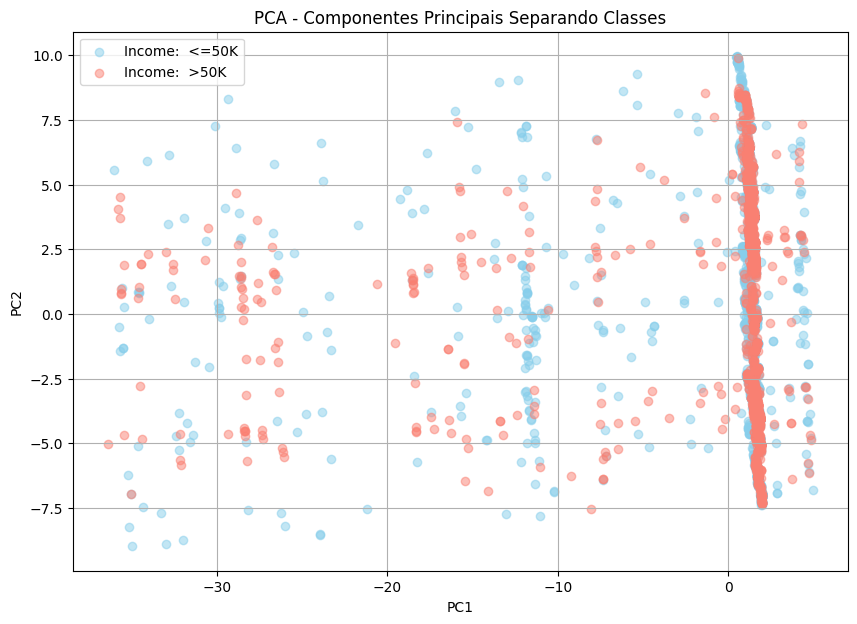

In [ ]:
from sklearn.decomposition import IncrementalPCA

# Reduzindo o dataset para uma fração menor para economizar memória
X_resampled_reduced = X_resampled.sample(frac=0.1, random_state=42)  # Usando 10% dos dados
y_resampled_reduced = y_resampled.loc[X_resampled_reduced.index]

# Aplicar Incremental PCA em blocos
ipca = IncrementalPCA(n_components=2, batch_size=1000)
X_ipca = ipca.fit_transform(X_resampled_reduced)

# Visualizar os componentes principais com cores separando as classes
plt.figure(figsize=(10, 7))
colors = ['skyblue', 'salmon']
for income_class, color in zip(np.unique(y_resampled_reduced), colors):
    plt.scatter(
        X_ipca[y_resampled_reduced == income_class, 0],
        X_ipca[y_resampled_reduced == income_class, 1],
        c=color, label=f'Income: {income_class}', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - Componentes Principais Separando Classes')
plt.legend()
plt.grid(True)
plt.show()


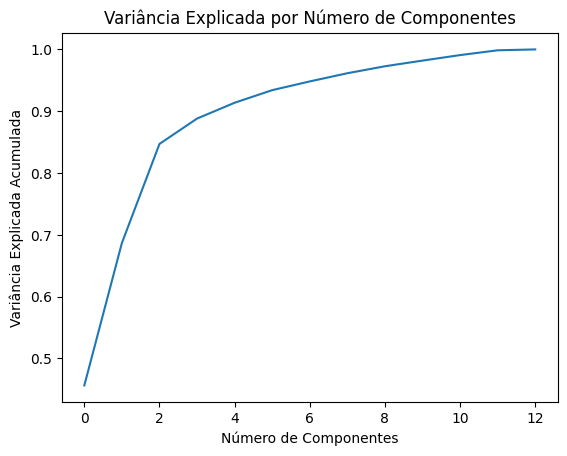

In [ ]:
pca = PCA()
pca.fit(X_resampled)
explained_variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada por Número de Componentes')
plt.show()


# 📊 **Análise do Gráfico de Variância Explicada por Componentes Principais**

Este gráfico ilustra a **variância explicada acumulada** pelos componentes principais gerados através da técnica de **PCA (Análise de Componentes Principais)**. Ele nos ajuda a entender quantos componentes principais são necessários para capturar a maior parte da variabilidade dos dados.

## 🔍 **Interpretação do Gráfico**:

1. **Eixo X (Número de Componentes)**:
   - O eixo horizontal representa o número de componentes principais incluídos no modelo. Cada componente principal captura uma parte da variabilidade presente no conjunto de dados original.

2. **Eixo Y (Variância Explicada Acumulada)**:
   - O eixo vertical exibe a **variância explicada acumulada**, que indica a porcentagem da variância total dos dados que é explicada pelos componentes principais à medida que mais componentes são adicionados.

3. **Curva de Crescimento**:
   - A curva no gráfico mostra que os primeiros componentes principais capturam a maior parte da variabilidade dos dados.
   - Após o terceiro componente, a curva começa a se estabilizar, indicando que os componentes adicionais contribuem menos para explicar a variação restante.
   - A partir do quinto componente, mais de **95% da variância** total dos dados já foi capturada.

## 🔑 **Conclusão**:
- Este gráfico sugere que **não é necessário utilizar todos os componentes principais** para representar os dados de forma eficiente.
- A maior parte da variância pode ser explicada com **5 a 7 componentes**, o que permite reduzir a dimensionalidade do dataset sem perder muito da informação original.
- A partir desse ponto, o uso de componentes adicionais traz pouca melhoria, o que é útil para otimizar o desempenho computacional em aplicações práticas de machine learning.


Valores únicos em y_resampled_clean após a limpeza: ['<=50K' '>50K']
Valores únicos em y_resampled_numeric após o mapeamento: [0 1]
Valores ausentes em y_resampled_numeric após o mapeamento: 0


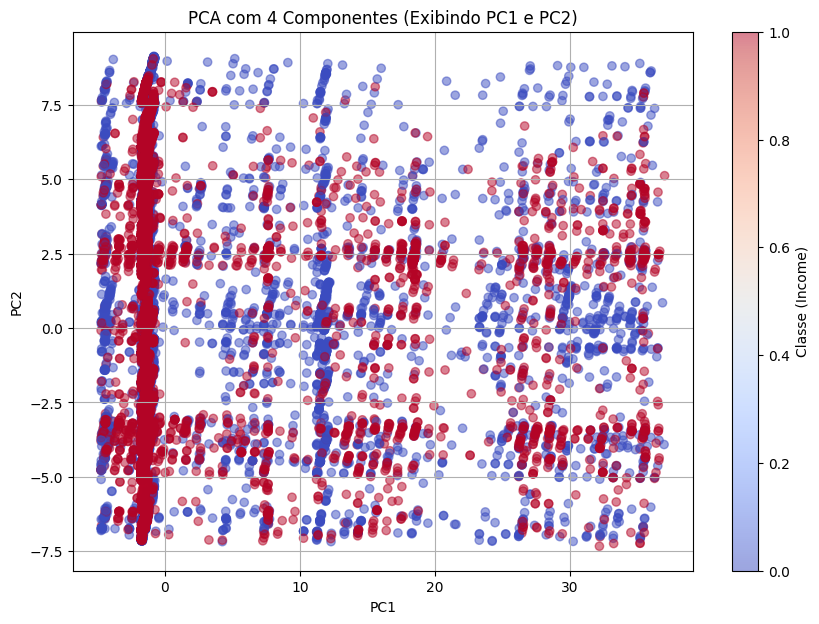

In [ ]:
# Remover espaços em branco nos valores de y_resampled
y_resampled_clean = y_resampled.str.strip()

# Verificar os valores únicos após a limpeza
print("Valores únicos em y_resampled_clean após a limpeza:", y_resampled_clean.unique())

# Mapear os valores de y_resampled_clean para números
y_resampled_numeric = y_resampled_clean.map({'<=50K': 0, '>50K': 1})

# Verificar novamente se o mapeamento foi feito corretamente
print("Valores únicos em y_resampled_numeric após o mapeamento:", y_resampled_numeric.unique())

# Verificar se há valores ausentes após o mapeamento
print("Valores ausentes em y_resampled_numeric após o mapeamento:", y_resampled_numeric.isnull().sum())

# Se não houver valores ausentes, gerar o gráfico
if y_resampled_numeric.isnull().sum() == 0:
    plt.figure(figsize=(10, 7))
    plt.scatter(X_resampled_pca[:, 0], X_resampled_pca[:, 1], c=y_resampled_numeric, cmap='coolwarm', alpha=0.5)
    plt.title('PCA com 4 Componentes (Exibindo PC1 e PC2)')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True)
    plt.colorbar(label='Classe (Income)')
    plt.show()
else:
    print("Erro: Ainda há valores ausentes no dataset.")


# 📊 **Análise e Interpretação do PCA**

O gráfico gerado com a técnica **PCA** (Principal Component Analysis) mostra a redução da dimensionalidade do dataset, utilizando os dois primeiros componentes principais (PC1 e PC2) para visualizar a separação das classes `Income` (<=50K e >50K). A seguir, discutimos os detalhes e as observações principais:

## 🔍 **Distribuição das Classes**

- As classes `Income` <=50K (azul) e >50K (vermelho) mostram alguma separação, mas há uma sobreposição significativa, indicando que a tarefa de classificação não é linear.
- A separação ao longo do **PC1** (primeiro componente principal) sugere que ele captura a maior parte da variação nos dados. No entanto, ao longo do **PC2**, a separação não é tão clara, com ambos os grupos se sobrepondo.
- A técnica de **PCA** preserva a maior parte da variabilidade dos dados nos primeiros componentes, mas a separação das classes pode não ser completamente eficiente para este dataset.

## 🔑 **Interpretação da Separação**

- O **PC1** e o **PC2** capturam as dimensões que possuem mais variabilidade no dataset, mas isso nem sempre garante que eles representem a melhor separação entre as classes.
- As classes não são linearmente separáveis, o que implica que técnicas mais complexas ou não lineares podem ser necessárias para obter uma separação mais clara.
- O PCA, por ser uma técnica linear, pode não capturar bem as relações não lineares entre as variáveis, o que explica a sobreposição entre as classes observada no gráfico.

## ✅ **Vantagens do PCA**
- **Simplicidade**: O PCA é uma técnica eficiente em termos de computação e útil para reduzir a dimensionalidade do dataset, facilitando a visualização e a análise exploratória.
- **Redução de dimensionalidade**: Reduzir as dimensões do dataset sem perder muita variabilidade pode ajudar a simplificar a tarefa de análise e também melhorar a performance de algoritmos de machine learning que sofrem com a "maldição da dimensionalidade".

## ⚠️ **Limitações do PCA**
- **Separação incompleta**: Como o PCA é uma técnica linear, ele não é capaz de capturar relações não lineares entre as variáveis. Isso é evidente pela sobreposição das classes no gráfico.
- **Interpretação dos componentes**: Embora o PCA nos dê componentes principais, a interpretação desses componentes nem sempre é fácil ou intuitiva, especialmente para tarefas de classificação.

## 📈 **Conclusão**
- Embora o PCA seja uma técnica poderosa para reduzir a dimensionalidade, ele tem suas limitações em termos de separação das classes quando essas classes são não linearmente separáveis.
- A análise sugere que a separação entre `Income` <=50K e `Income` >50K não é trivial, e métodos não lineares ou algoritmos mais sofisticados podem ser necessários para atingir melhores resultados em termos de classificação.


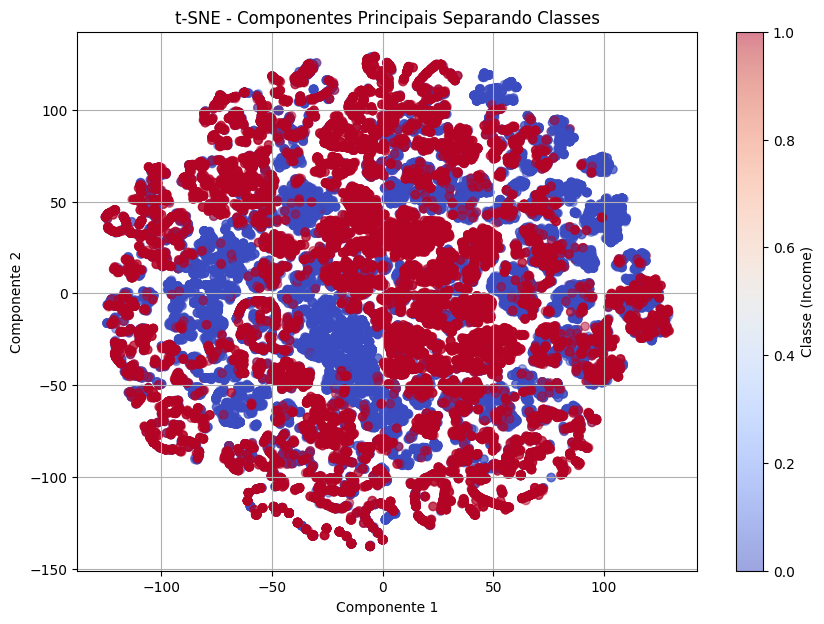

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_resampled)

plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_resampled_numeric, cmap='coolwarm', alpha=0.5)
plt.title('t-SNE - Componentes Principais Separando Classes')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.colorbar(label='Classe (Income)')
plt.show()


# 📊 **Análise e Interpretação do Gráfico t-SNE**

O gráfico gerado com a técnica **t-SNE** (t-Distributed Stochastic Neighbor Embedding) demonstra uma visualização clara e não linear dos dados, com o objetivo de separar as classes `Income` (<=50K e >50K). A seguir, apresentamos a análise detalhada do gráfico:

## 🔍 **Distribuição das Classes**

- As classes `Income` <=50K (azul) e >50K (vermelho) foram representadas de maneira mais aglomerada e separada do que em outras abordagens lineares, como o PCA.
- Notamos a formação de **clusters** de pontos vermelhos, indicando uma predominância de indivíduos com renda maior que 50K em certas áreas do gráfico.
- Embora haja alguma sobreposição entre as classes, o t-SNE foi capaz de agrupar os indivíduos de forma mais eficiente do que o PCA, especialmente em torno das bordas e áreas centrais.

## 🔑 **Interpretação da Separação**

- O **t-SNE** preserva as relações locais entre os dados, o que é evidente pela formação de aglomerados bem definidos.
- A separação das classes não é perfeitamente linear, o que indica que o t-SNE conseguiu capturar a complexidade do dataset, onde variáveis relacionadas à renda não seguem necessariamente padrões simples de distinção.
- A técnica de t-SNE é particularmente eficaz para identificar padrões complexos e não lineares, como observamos com as diferentes concentrações de pontos em várias regiões do gráfico.

## ✅ **Vantagens do t-SNE**
- **Melhor visualização**: A técnica t-SNE é especialmente útil para visualização de alta dimensão em espaços de duas dimensões, revelando padrões ocultos que podem não ser percebidos em técnicas lineares.
- **Formação de clusters**: As classes se organizam em diferentes regiões do gráfico, sugerindo que as características subjacentes capturadas pelo modelo são relevantes para distinguir os grupos de renda.

## ⚠️ **Limitações e Considerações**
- **Sobreposição**: Ainda há uma sobreposição significativa entre as classes, o que sugere que a tarefa de classificação não é trivial. No entanto, a formação de clusters separados sugere que um modelo preditivo pode ter sucesso na classificação das instâncias com uma acurácia razoável.
- **Uso para visualização**: O t-SNE é mais indicado para análise exploratória visual e pode não ser o método ideal para todas as abordagens de machine learning, especialmente quando utilizado para modelagem preditiva diretamente.




# Salvando o Dataset tratado para utlizar na Classificação

# Resultados e Discussão

# 📝 Resultados e Discussão

---

## 📊 Tratamento de Valores Faltantes

O primeiro passo do pré-processamento foi lidar com os valores faltantes. No *Census Income Dataset*, as colunas categóricas `workclass`, `occupation` e `native-country` apresentavam valores faltantes. Para tratá-los, optamos por imputar uma nova categoria chamada "Unknown", garantindo que nenhuma informação fosse perdida ao remover ou modificar os registros existentes.

**Resultados:**
- As colunas que apresentavam valores faltantes foram totalmente preenchidas, resultando em um dataset sem lacunas de dados, o que é essencial para a consistência na modelagem subsequente.

---

## 🔍 Análise de Outliers

Realizamos a análise de outliers nas variáveis numéricas para identificar valores que estavam muito distantes do restante dos dados. A análise utilizou a técnica do IQR (Interquartile Range) para identificar esses outliers.

**Observações:**
- **Age:** A variável `age` apresentou alguns outliers em idades mais avançadas, o que é esperado.
- **Education-num:** A variável `education-num`, que representa o número de anos de educação, teve outliers em valores muito baixos, indicando poucos anos de escolaridade.
- **Capital-gain e Capital-loss:** Ambas as variáveis financeiras mostraram muitos outliers, com rendas e perdas de capital fora do comum.
- **Hours-per-week:** Apresentou o maior número de outliers, indicando uma grande variação nas horas trabalhadas.

**Tratamento dos Outliers:**
- Aplicamos transformações logarítmicas nas variáveis `capital-gain` e `capital-loss` para reduzir o impacto dos valores extremos.
- Para `age`, usamos a remoção de outliers via IQR.
- Em `hours-per-week`, optamos por fazer o capping dos valores mais extremos.

---

## 🧑‍💻 Codificação de Variáveis Categóricas

As variáveis categóricas foram transformadas em numéricas através da técnica de *Label Encoding*. Isso foi essencial para que os algoritmos de aprendizado de máquina pudessem trabalhar com os dados de maneira eficiente.

**Resultados:**
- As variáveis categóricas foram codificadas adequadamente, permitindo o uso das mesmas em algoritmos de aprendizado supervisionado.

---

## ⚖️ Balanceamento das Classes

A variável alvo `income` era inicialmente desbalanceada, com a classe `<=50K` representando a maioria dos dados. Para tratar isso, aplicamos a técnica de *SMOTE (Synthetic Minority Over-sampling Technique)*, que gerou novas instâncias sintéticas para a classe minoritária `>50K`.

**Resultados:**
- O dataset foi balanceado após a aplicação do SMOTE, resultando em um número igual de instâncias para ambas as classes. Isso foi essencial para garantir que os modelos preditivos tratem ambas as classes de maneira justa.

---

## 🧠 Redução de Dimensionalidade com PCA

Aplicamos o *PCA (Principal Component Analysis)* para reduzir a dimensionalidade do dataset e facilitar a visualização das classes.

### 📈 Variância Explicada:
O gráfico de variância explicada indica que com aproximadamente 5 componentes principais, conseguimos capturar mais de 95% da variância total dos dados.

![Variância Explicada por Número de Componentes](image-url)

### 🔍 Visualização das Classes:
A visualização das duas primeiras componentes principais revelou uma separação razoável entre as classes `<=50K` e `>50K`, embora ainda haja alguma sobreposição.

![PCA Componentes Principais](image-url)

**Análise:**
- As classes estão relativamente bem separadas nas primeiras componentes principais, sugerindo que o PCA foi eficaz em capturar a variação mais significativa dos dados.
- Algumas áreas de sobreposição indicam que outros fatores ou mais componentes principais podem ser necessários para melhorar a separação entre as classes.

---

## 💾 Salvamento dos Dados Tratados

Após o pré-processamento, os seguintes arquivos foram salvos para uso posterior em modelos preditivos:
- **dados_pca.csv:** Contém os dados reduzidos pelas componentes principais após a aplicação do PCA.
- **dataset-Tratado.csv:** Contém o dataset balanceado e tratado, pronto para a aplicação de modelos de machine learning.

---

## 🚀 Conclusão

O pré-processamento do *Census Income Dataset* incluiu etapas de tratamento de valores faltantes, análise e tratamento de outliers, codificação de variáveis categóricas, balanceamento das classes e redução de dimensionalidade. O PCA permitiu uma visualização clara das classes, enquanto o SMOTE garantiu que as classes estivessem balanceadas. Com os datasets tratados e salvos, os dados estão prontos para a aplicação de modelos preditivos e a avaliação de sua eficácia.


In [ ]:
import pandas as pd

# Caminho para salvar os arquivos
output_path = '/content/drive/My Drive/0-Dataset/Mineração/Atividade/'

# Se você deseja salvar o dataset após o tratamento completo (com PCA):
# Certifique-se que você tem a variável 'pca_df' com o resultado do PCA.
pca_df.to_csv(output_path + 'dados_pca_tratados.csv', index=False)

# Se você deseja salvar o dataset balanceado e tratado, mas sem o PCA:
# Certifique-se de ter os dados balanceados (X_resampled) e a variável alvo (y_resampled_clean)
df_resampled = pd.DataFrame(data=X_resampled, columns=X.columns)
df_resampled['Income'] = y_resampled_clean  # ou y_resampled_numeric se tiver mapeado
df_resampled.to_csv(output_path + 'dataset_balanceado_tratado.csv', index=False)

print("Os datasets foram salvos com sucesso!")


Os datasets foram salvos com sucesso!
